# Exploratory Data Analysis - Wizeline ML Challenge

Comprehensive exploratory analysis before modeling.

**Contents:**
1. Descriptive statistics and data types
2. Histograms and Boxplots per variable
3. Pearson and Spearman correlation
4. Scatter plots of top features vs target
5. PCA (2D, 3D, explained variance)
6. VIF (Variance Inflation Factor)
7. Exploratory clustering
8. Feature interactions
9. Mutual Information
10. Target normality
11. Feature scaling


## 0. Imports and data loading


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
sns.set_style('whitegrid')


In [2]:
df = pd.read_csv('training_data.csv')
features = [c for c in df.columns if c != 'target']
X = df[features]
y = df['target']

print(f"Shape: {df.shape}")
print(f"Features: {len(features)}")
print(f"Samples: {len(df)}")


Shape: (800, 21)
Features: 20
Samples: 800


## 1. Descriptive Statistics and Data Types


In [3]:
print("Data types:")
print(df.dtypes)
print(f"\nTotal null values: {df.isnull().sum().sum()}")


Data types:
feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
target        float64
dtype: object

Total null values: 0


In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
feature_0,800.0,468.181612,270.797415,0.916648,239.330140,477.750620,704.650292,940.771543
feature_1,800.0,301.960218,170.691136,0.800119,157.338244,303.257176,448.878174,595.359858
feature_2,800.0,317.132996,176.501920,0.173025,167.516318,326.310194,474.484472,614.271632
feature_3,800.0,283.213456,157.698215,0.308823,151.302826,294.574403,415.806162,549.896216
feature_4,800.0,485.975950,272.594030,0.598527,250.305362,493.470486,720.747672,950.017444
feature_5,800.0,320.953859,185.157189,0.997347,158.374610,328.722464,480.076559,638.199832
feature_6,800.0,217.136330,123.660691,0.402436,106.876625,217.098090,327.411334,426.308251
feature_7,800.0,387.196289,235.131376,0.474825,195.037853,364.124238,588.565017,809.346792
feature_8,800.0,179.485453,104.059309,0.727850,94.220273,173.364771,268.790459,367.084755
feature_9,800.0,196.003058,111.042671,0.264253,95.052359,199.587048,291.546642,384.919108


## 2. Histograms per Variable


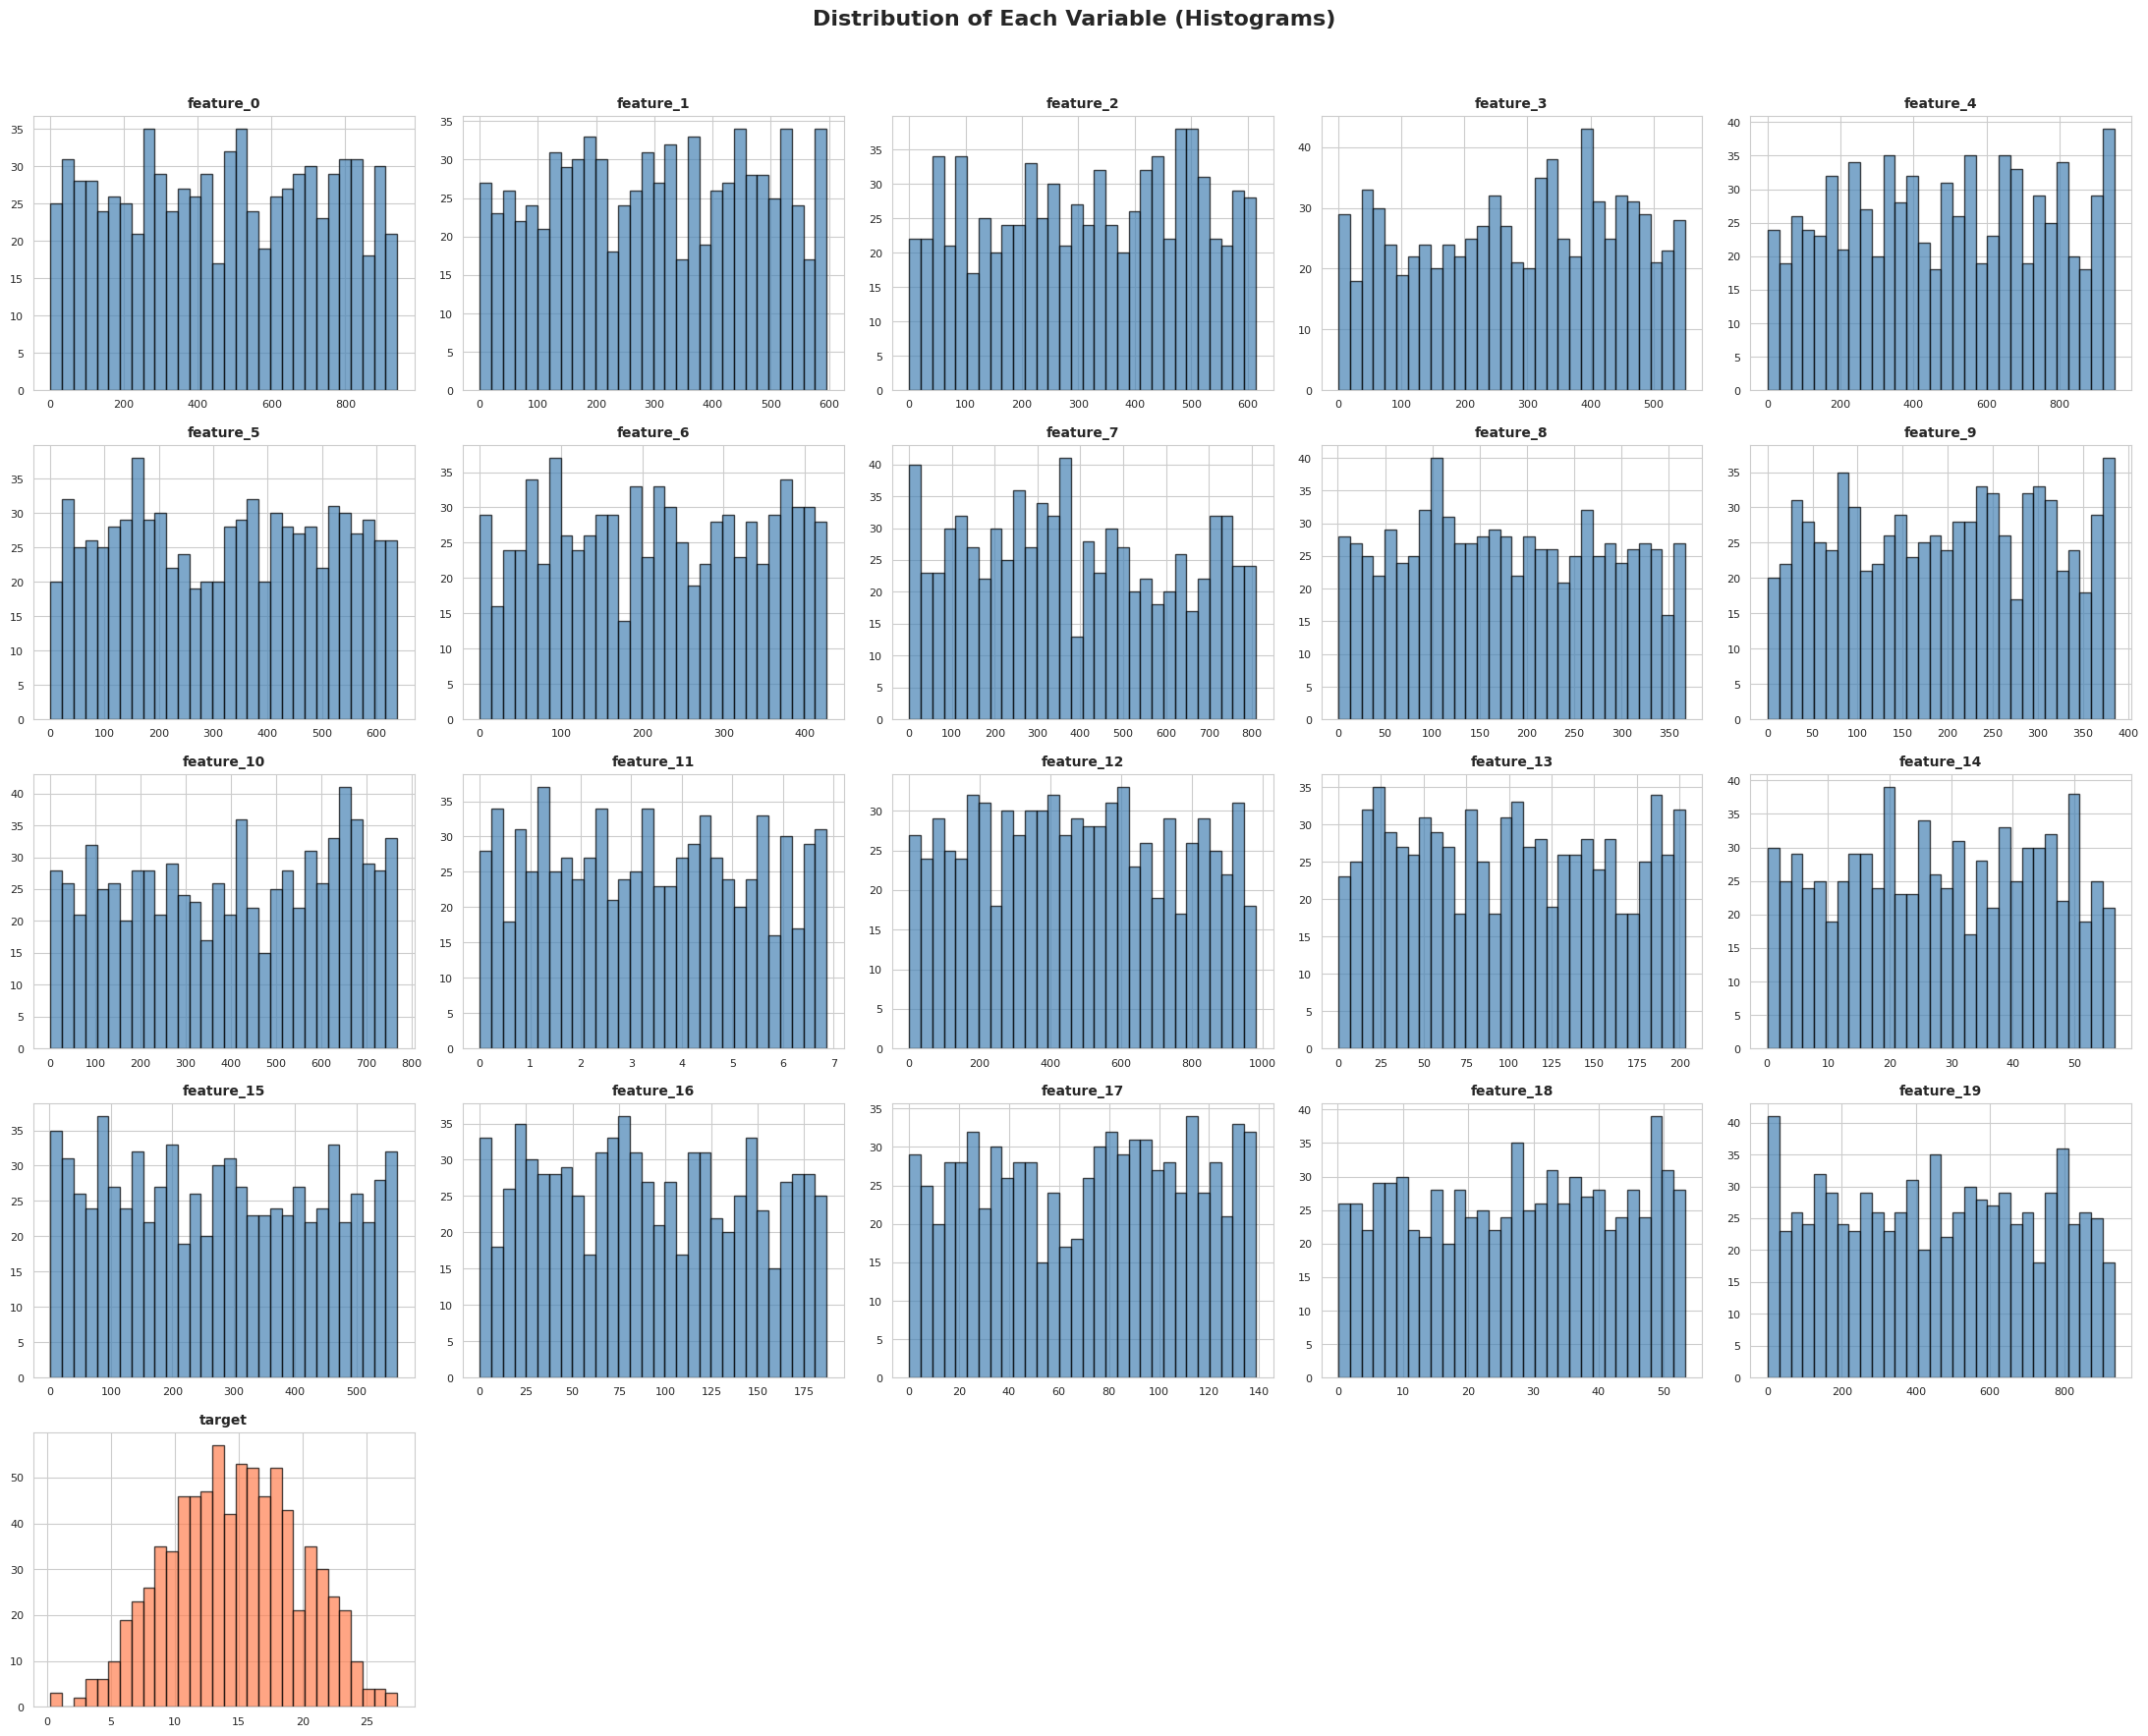

In [5]:
fig, axes = plt.subplots(5, 5, figsize=(22, 18))
axes = axes.flatten()
all_cols = features + ['target']

for i, col in enumerate(all_cols):
    ax = axes[i]
    ax.hist(df[col], bins=30, edgecolor='black', alpha=0.7,
            color='steelblue' if col != 'target' else 'coral')
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.tick_params(labelsize=8)

for j in range(len(all_cols), len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Distribution of Each Variable (Histograms)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 3. Boxplots per Variable


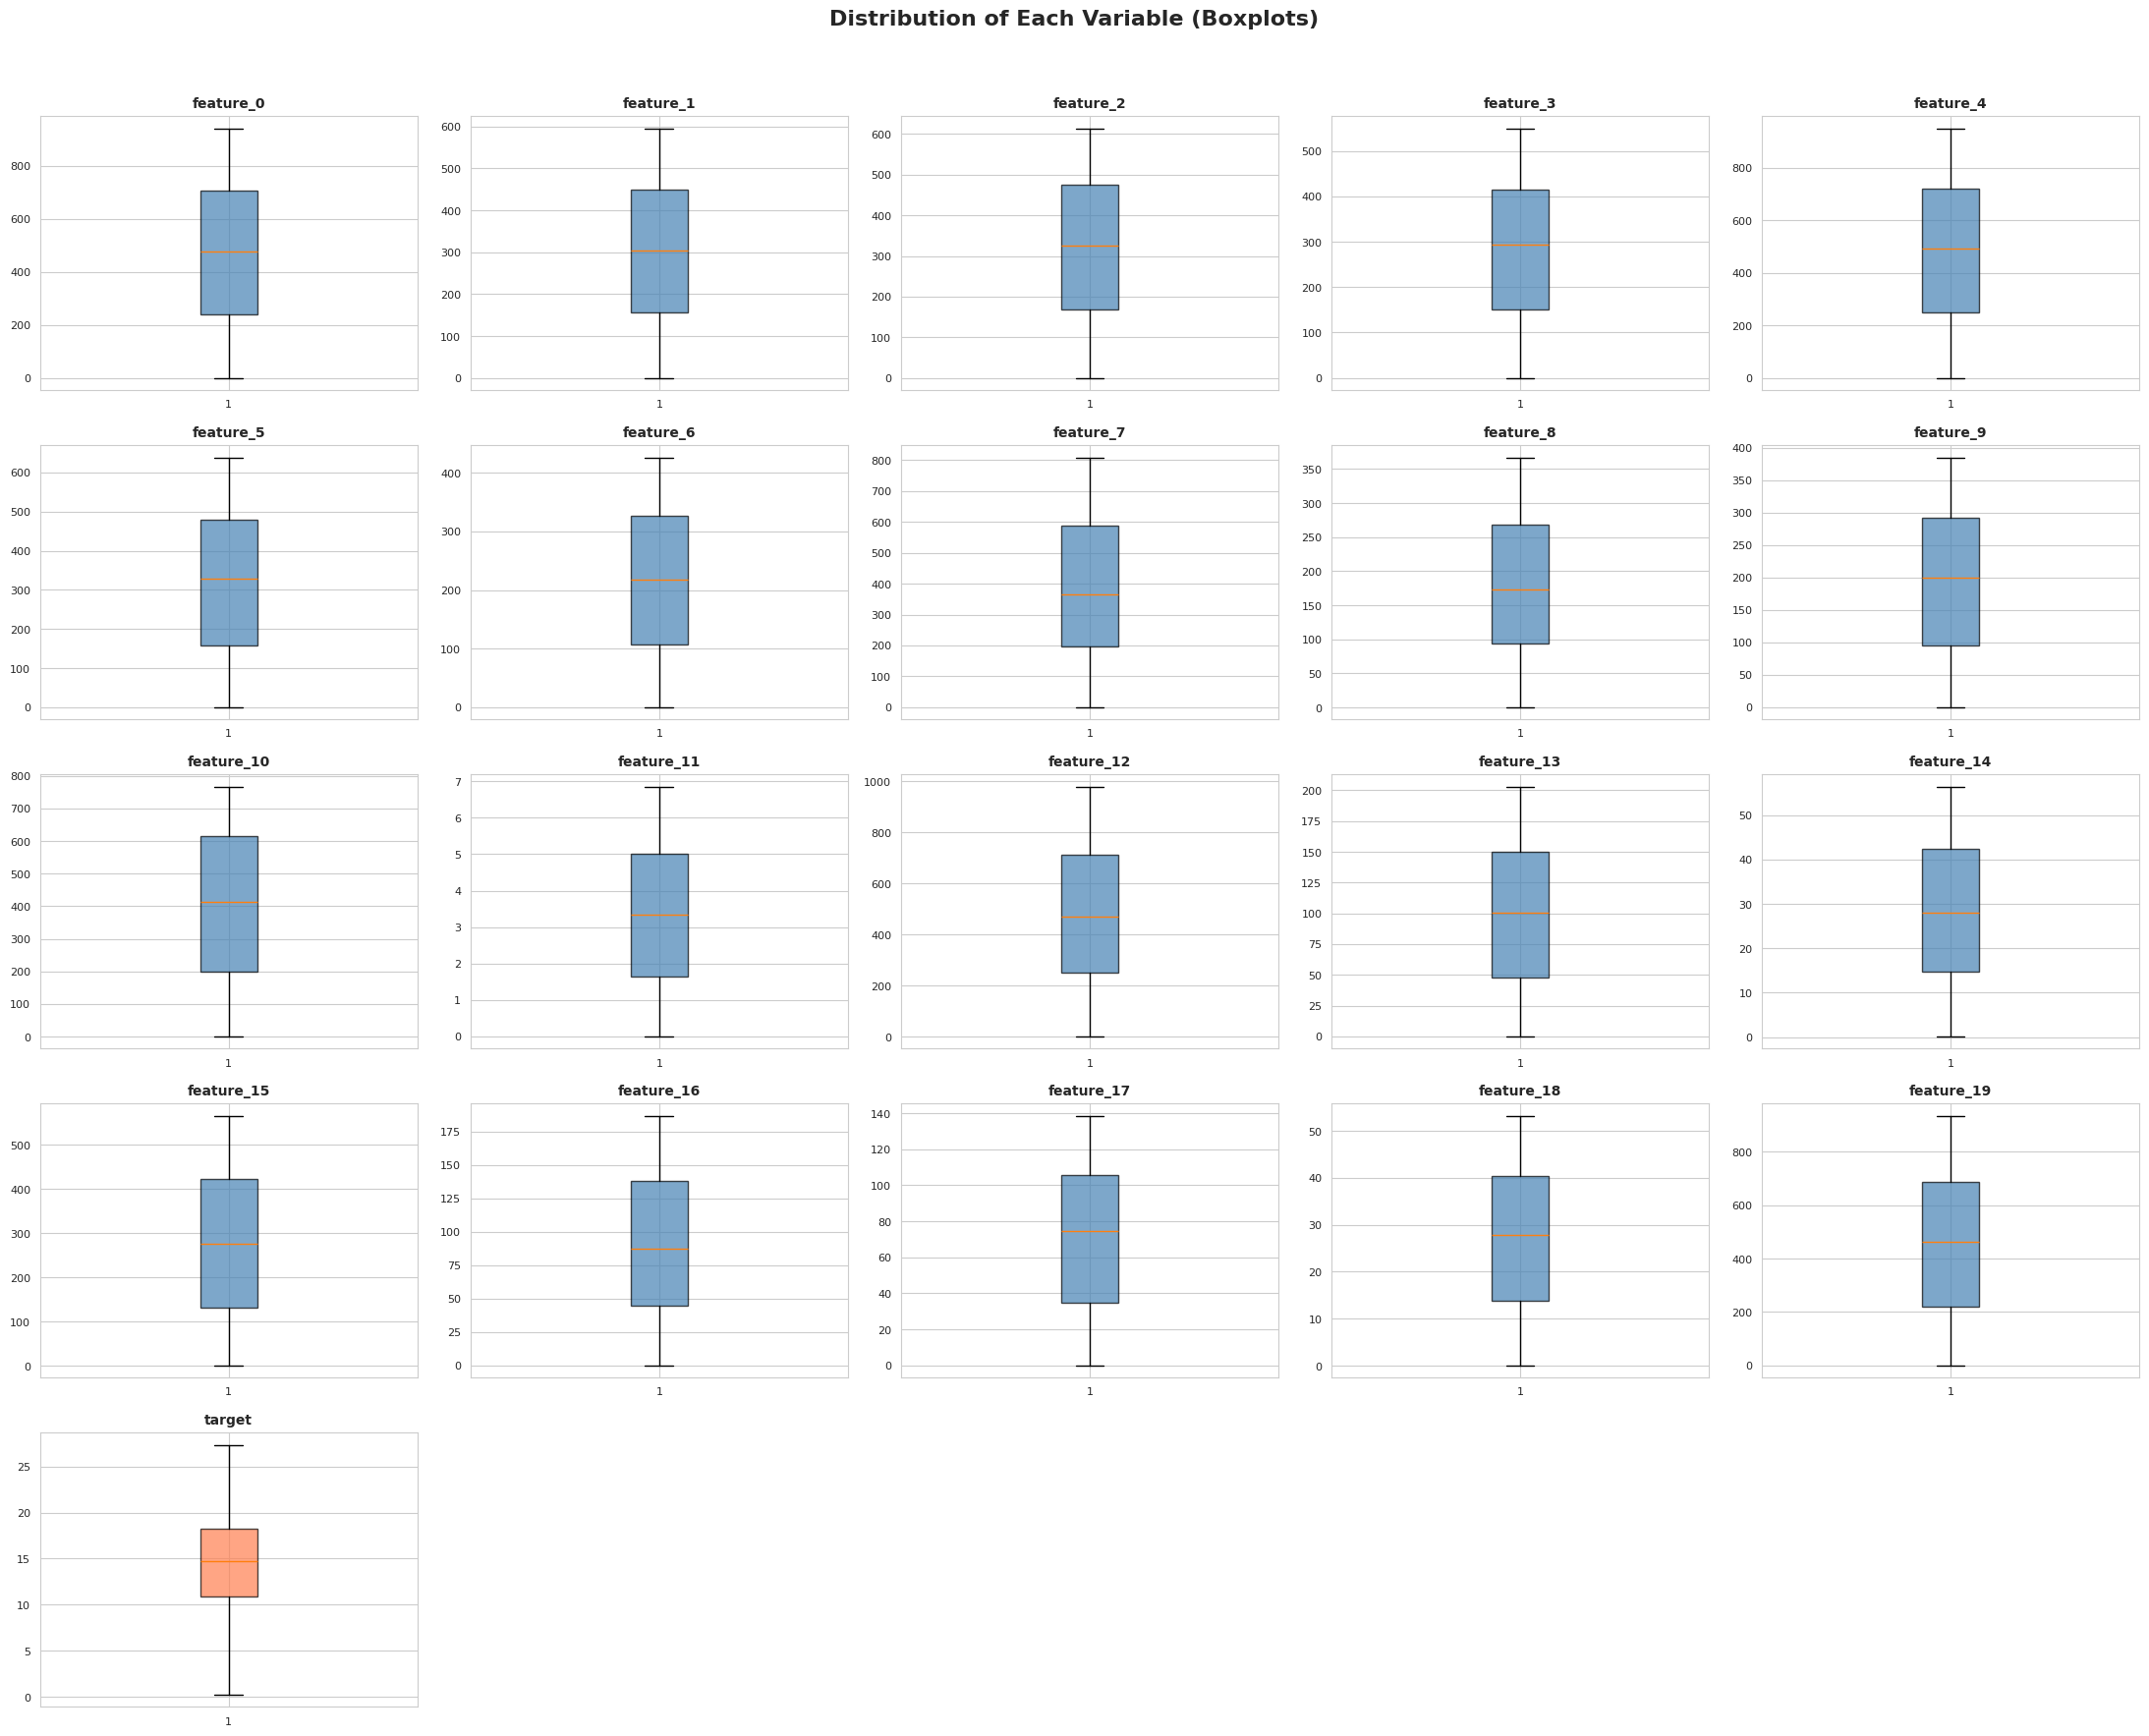

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(22, 18))
axes = axes.flatten()

for i, col in enumerate(all_cols):
    ax = axes[i]
    ax.boxplot(df[col], vert=True, patch_artist=True,
               boxprops=dict(facecolor='steelblue' if col != 'target' else 'coral', alpha=0.7))
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.tick_params(labelsize=8)

for j in range(len(all_cols), len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Distribution of Each Variable (Boxplots)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 4. Pearson Correlation (Linear)


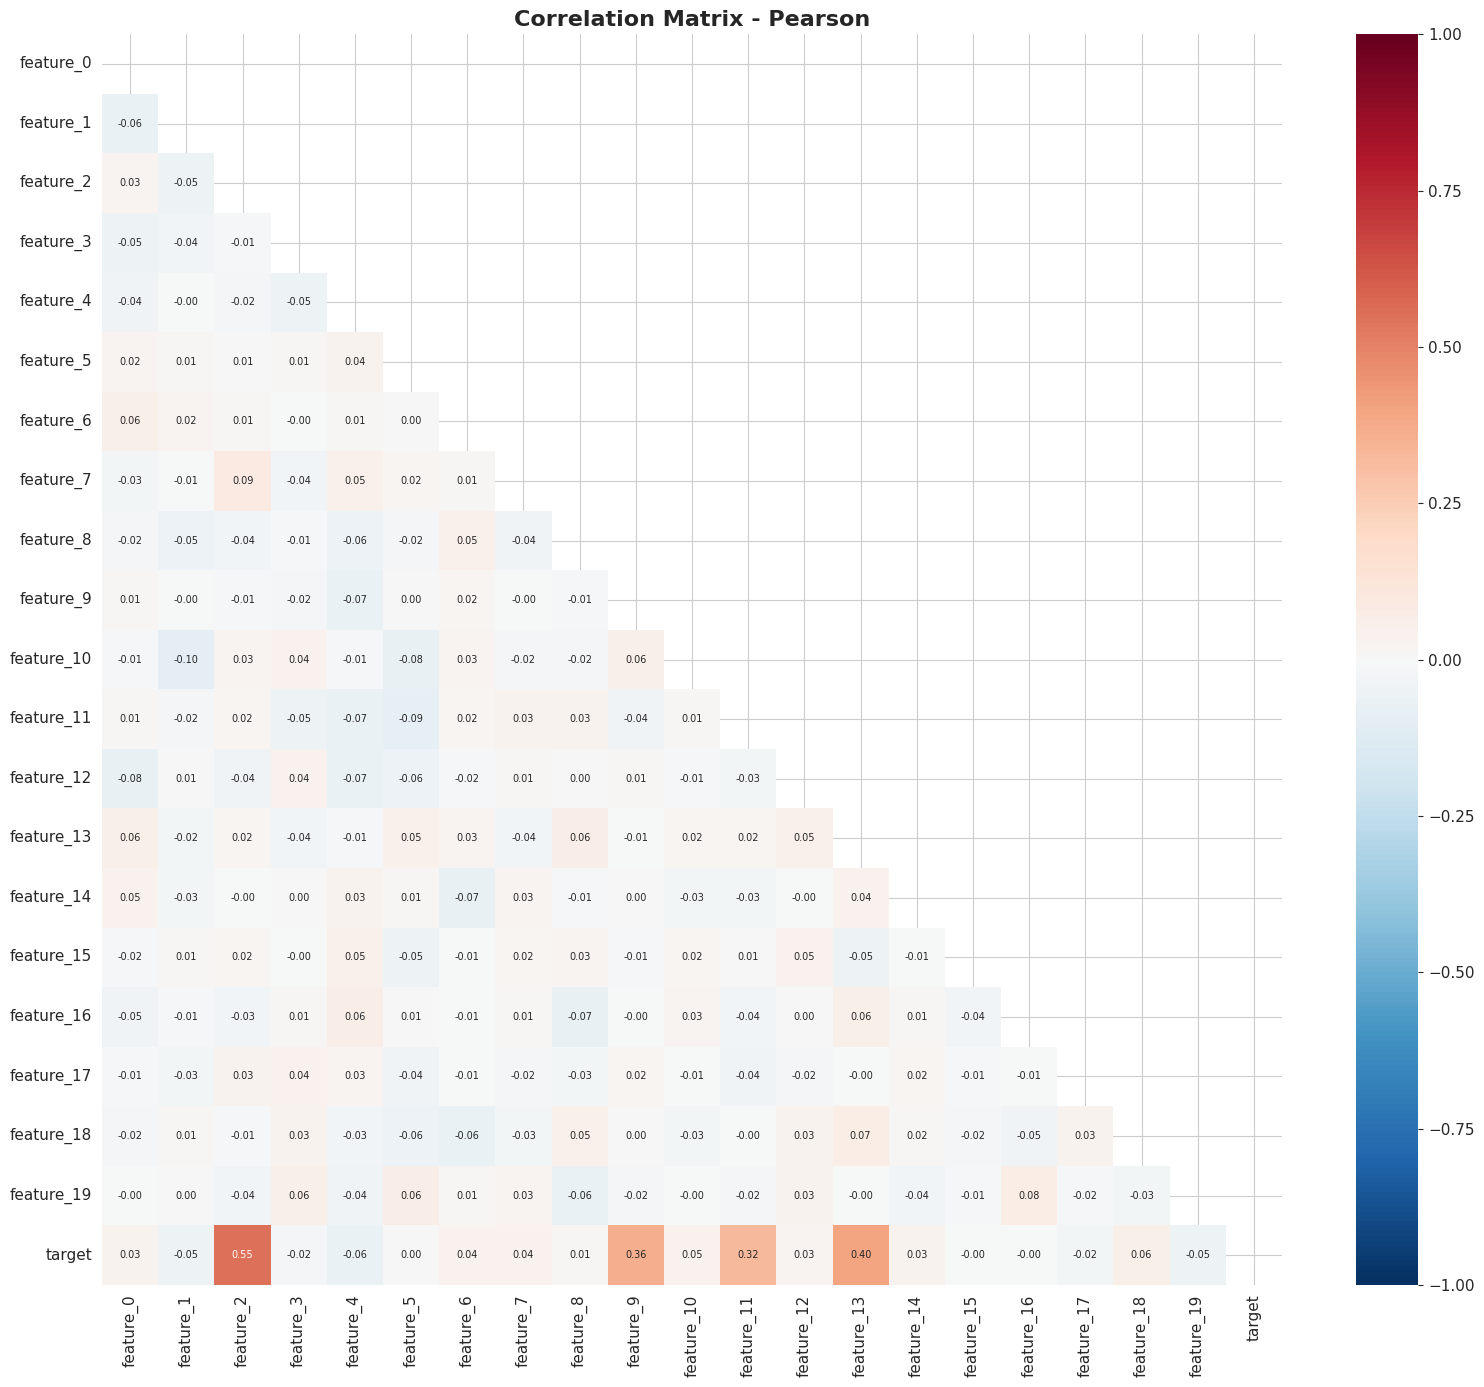


Pearson correlation with target (sorted by absolute value):
     feature_2:   0.5518
    feature_13:   0.4047
     feature_9:   0.3619
    feature_11:   0.3228
     feature_4:  -0.0627
    feature_18:   0.0601
    feature_19:  -0.0535
     feature_1:  -0.0472
    feature_10:   0.0455
     feature_6:   0.0444
     feature_7:   0.0411
    feature_14:   0.0349
     feature_0:   0.0341
    feature_12:   0.0297
    feature_17:  -0.0243
     feature_3:  -0.0168
     feature_8:   0.0100
    feature_16:  -0.0039
    feature_15:  -0.0006
     feature_5:   0.0003


In [7]:
corr_pearson = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))
sns.heatmap(corr_pearson, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, ax=ax, annot_kws={'size': 7})
ax.set_title('Correlation Matrix - Pearson', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nPearson correlation with target (sorted by absolute value):")
corr_with_target = corr_pearson['target'].drop('target').abs().sort_values(ascending=False)
for feat in corr_with_target.index:
    print(f"  {feat:>12}: {corr_pearson['target'][feat]:>8.4f}")


## 5. Spearman Correlation (Monotonic non-linear)


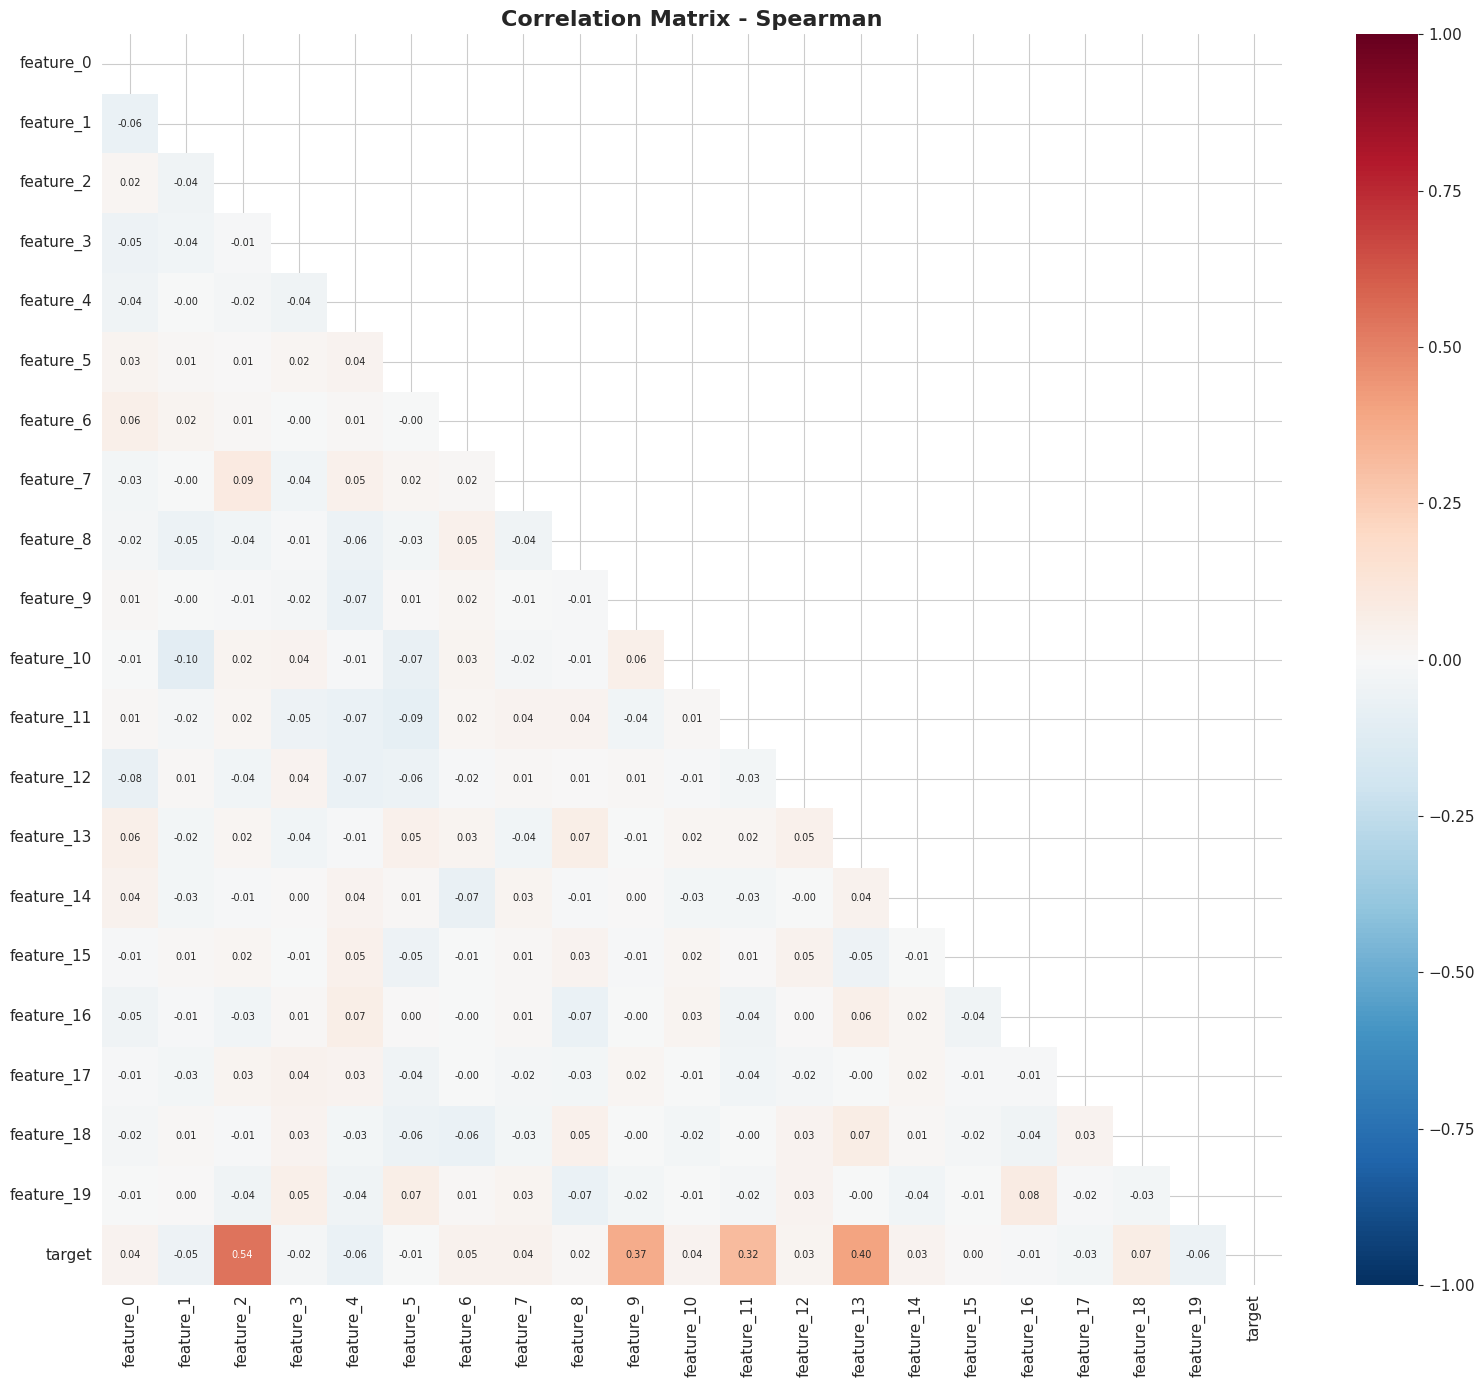

In [8]:
corr_spearman = df.corr(method='spearman')

fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr_spearman, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, ax=ax, annot_kws={'size': 7})
ax.set_title('Correlation Matrix - Spearman', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


## 6. Scatter Plots - Top 10 Features vs Target


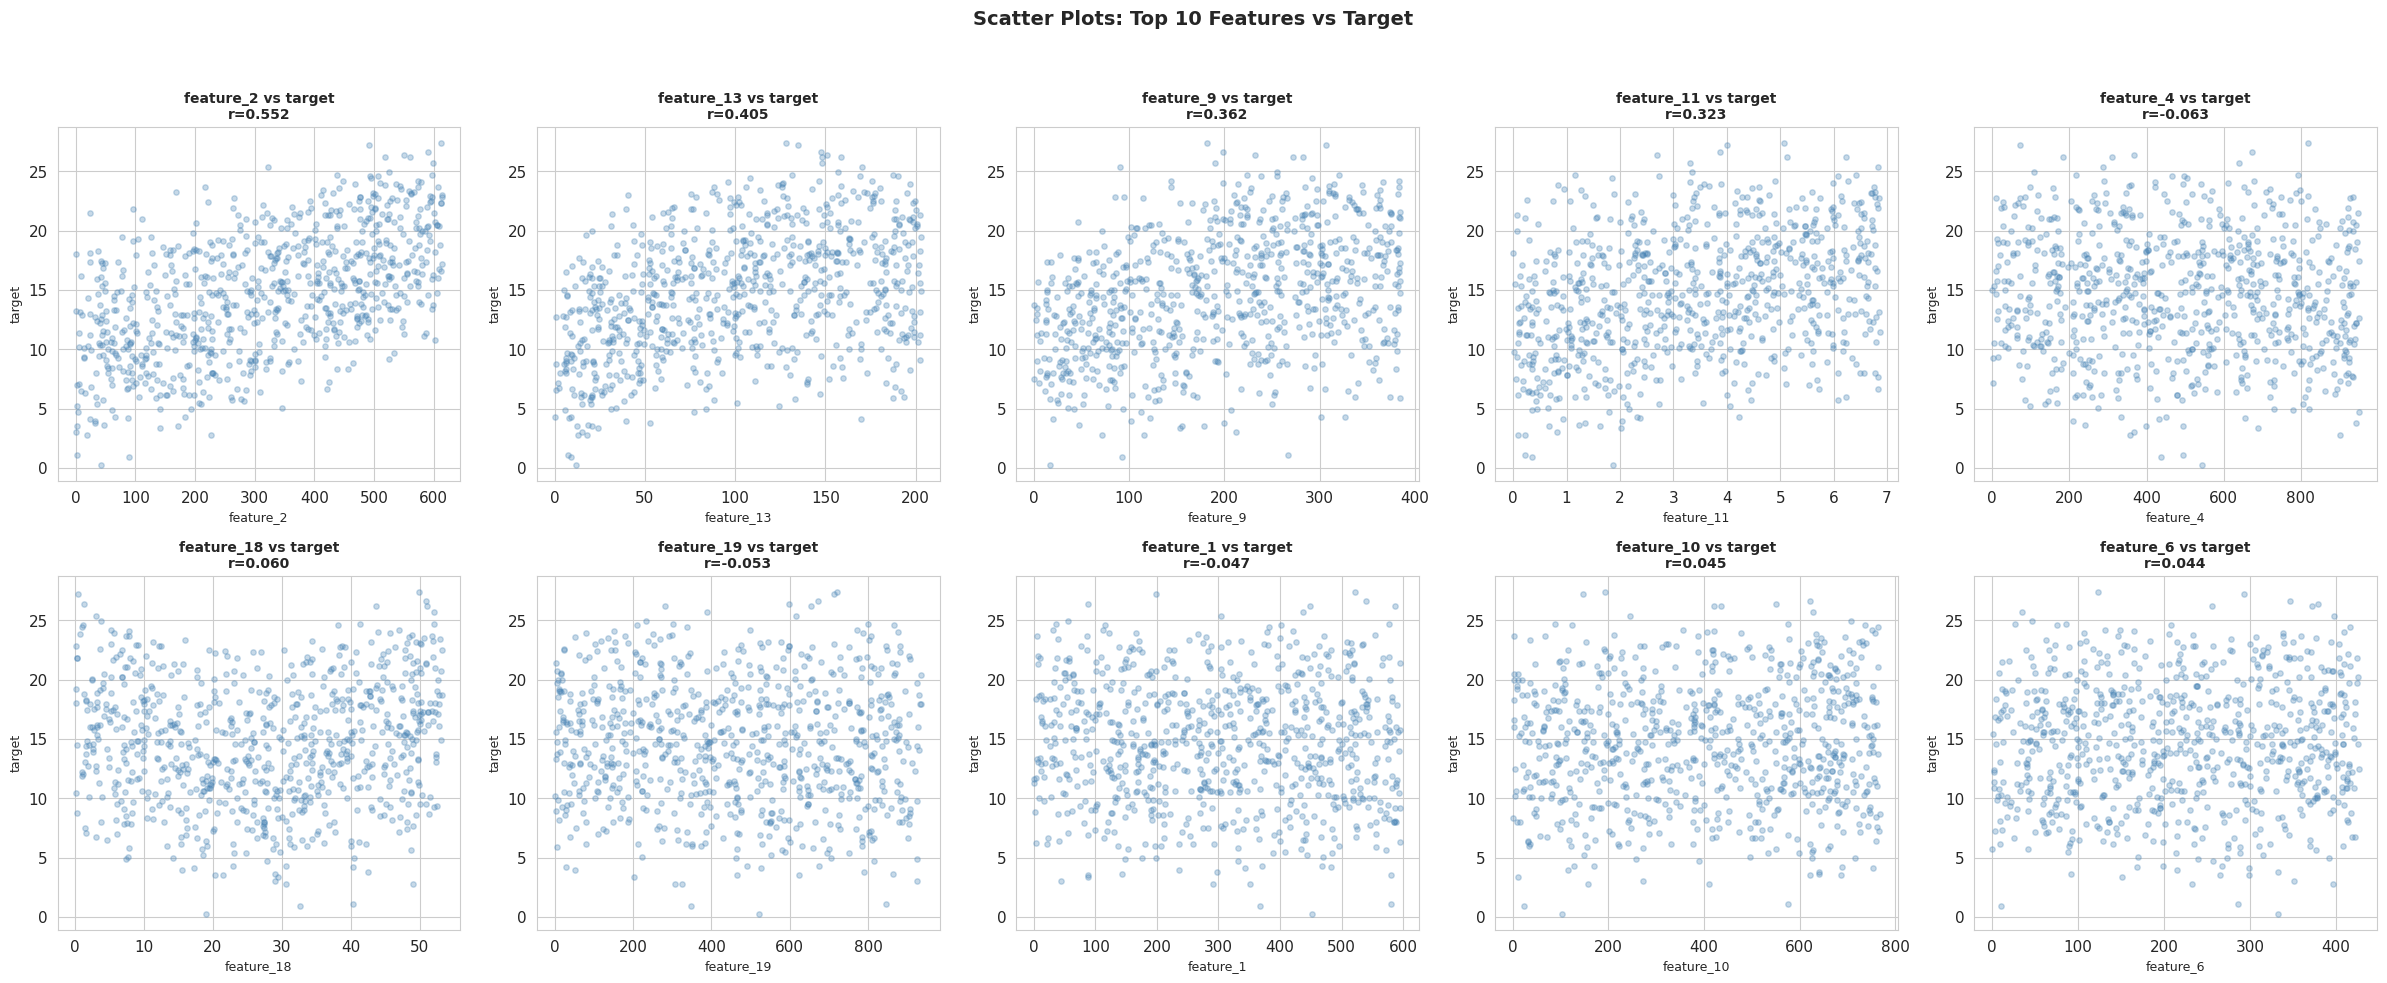

In [9]:
top_features = corr_with_target.head(10).index.tolist()

fig, axes = plt.subplots(2, 5, figsize=(24, 10))
axes = axes.flatten()

for i, feat in enumerate(top_features):
    ax = axes[i]
    ax.scatter(df[feat], y, alpha=0.3, s=15, c='steelblue')
    ax.set_xlabel(feat, fontsize=9)
    ax.set_ylabel('target', fontsize=9)
    ax.set_title(f'{feat} vs target\nr={corr_pearson["target"][feat]:.3f}', fontsize=10, fontweight='bold')

plt.suptitle('Scatter Plots: Top 10 Features vs Target', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 7. PCA - Principal Component Analysis

### 7.1 Explained Variance and 2D PCA


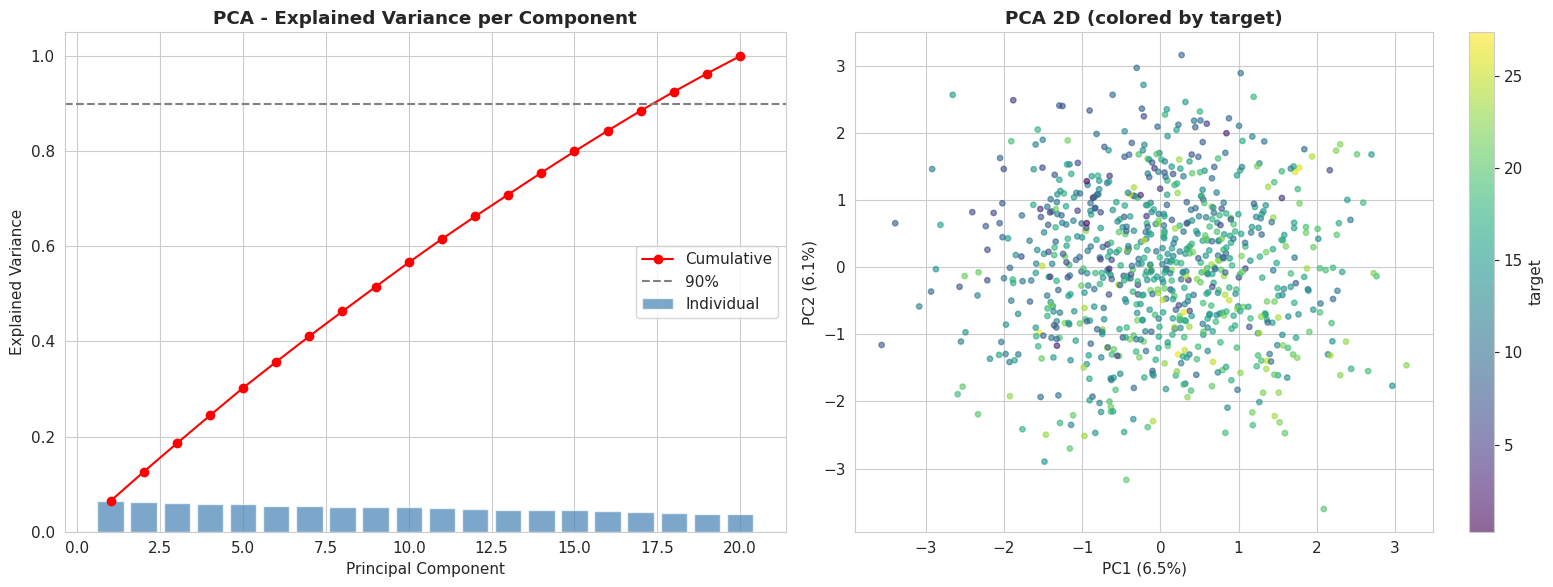

Cumulative variance with 5 components: 30.2%
Cumulative variance with 10 components: 56.6%
Components needed for 90% variance: 18


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA()
pca_full.fit(X_scaled)
cumvar = np.cumsum(pca_full.explained_variance_ratio_)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(range(1, 21), pca_full.explained_variance_ratio_, alpha=0.7, color='steelblue', label='Individual')
axes[0].plot(range(1, 21), cumvar, 'ro-', label='Cumulative')
axes[0].axhline(y=0.9, color='gray', linestyle='--', label='90%')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_title('PCA - Explained Variance per Component', fontweight='bold')
axes[0].legend()

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
sc = axes[1].scatter(X_pca2[:, 0], X_pca2[:, 1], c=y, cmap='viridis', alpha=0.6, s=15)
axes[1].set_xlabel(f'PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title('PCA 2D (colored by target)', fontweight='bold')
plt.colorbar(sc, ax=axes[1], label='target')
plt.tight_layout()
plt.show()

print(f"Cumulative variance with 5 components: {cumvar[4]*100:.1f}%")
print(f"Cumulative variance with 10 components: {cumvar[9]*100:.1f}%")
print(f"Components needed for 90% variance: {np.argmax(cumvar >= 0.9) + 1}")


### 7.2 PCA 3D


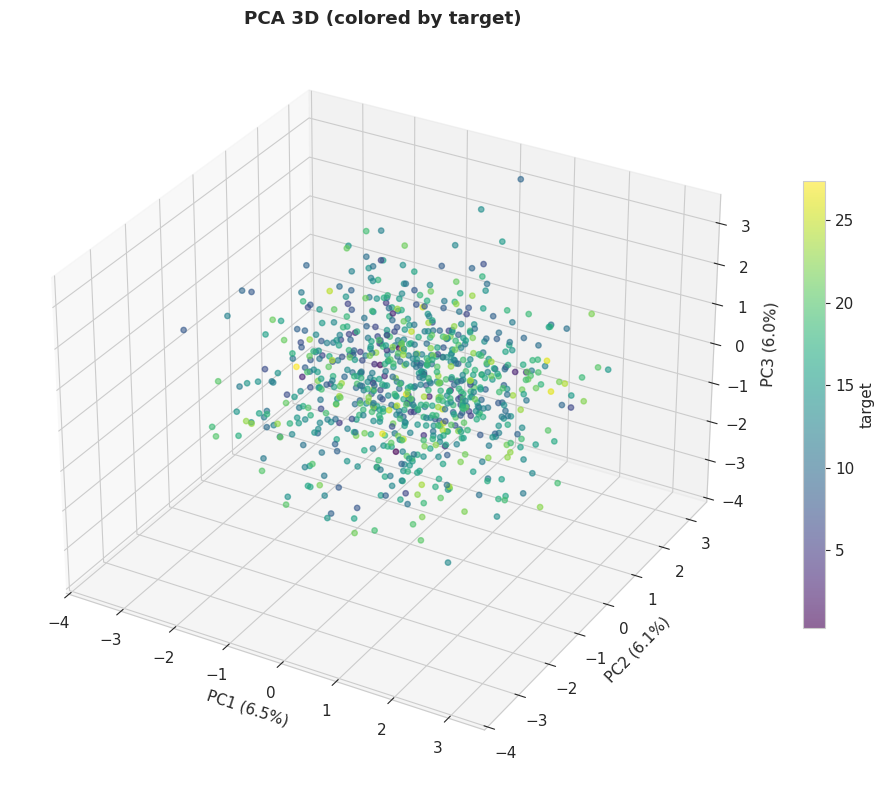

In [11]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=y, cmap='viridis', alpha=0.6, s=15)
ax.set_xlabel(f'PC1 ({pca3.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca3.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_zlabel(f'PC3 ({pca3.explained_variance_ratio_[2]*100:.1f}%)')
ax.set_title('PCA 3D (colored by target)', fontweight='bold')
plt.colorbar(sc, ax=ax, shrink=0.6, label='target')
plt.tight_layout()
plt.show()


## 8. VIF - Variance Inflation Factor

Measures multivariate collinearity. VIF > 5 indicates a problem, VIF > 10 is severe.


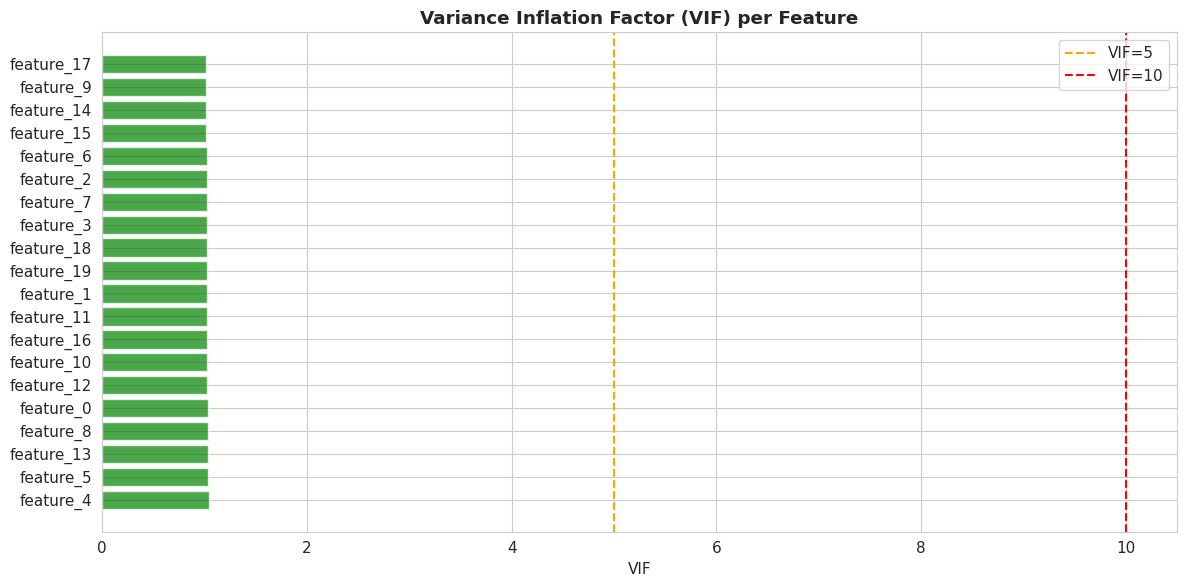

   Feature    VIF  R_squared
 feature_4 1.0401     0.0386
 feature_5 1.0369     0.0356
feature_13 1.0340     0.0328
 feature_8 1.0328     0.0318
 feature_0 1.0306     0.0297
feature_12 1.0280     0.0272
feature_10 1.0278     0.0270
feature_16 1.0277     0.0270
feature_11 1.0264     0.0258
 feature_1 1.0262     0.0256
feature_19 1.0257     0.0251
feature_18 1.0248     0.0242
 feature_3 1.0222     0.0217
 feature_7 1.0216     0.0212
 feature_2 1.0211     0.0207
 feature_6 1.0209     0.0204
feature_15 1.0160     0.0158
feature_14 1.0158     0.0156
 feature_9 1.0131     0.0129
feature_17 1.0122     0.0120


In [12]:
vif_data = []
for i, col in enumerate(features):
    other_features = [f for f in features if f != col]
    reg = LinearRegression()
    reg.fit(X[other_features], X[col])
    r_squared = reg.score(X[other_features], X[col])
    vif = 1 / (1 - r_squared) if r_squared < 1 else float('inf')
    vif_data.append({'Feature': col, 'VIF': round(vif, 4), 'R_squared': round(r_squared, 4)})

vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['red' if v > 10 else 'orange' if v > 5 else 'green' for v in vif_df['VIF']]
ax.barh(vif_df['Feature'], vif_df['VIF'], color=colors, alpha=0.7)
ax.axvline(x=5, color='orange', linestyle='--', label='VIF=5')
ax.axvline(x=10, color='red', linestyle='--', label='VIF=10')
ax.set_xlabel('VIF')
ax.set_title('Variance Inflation Factor (VIF) per Feature', fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

print(vif_df.to_string(index=False))


## 9. Exploratory Clustering

K-Means to detect natural subgroups in the data.


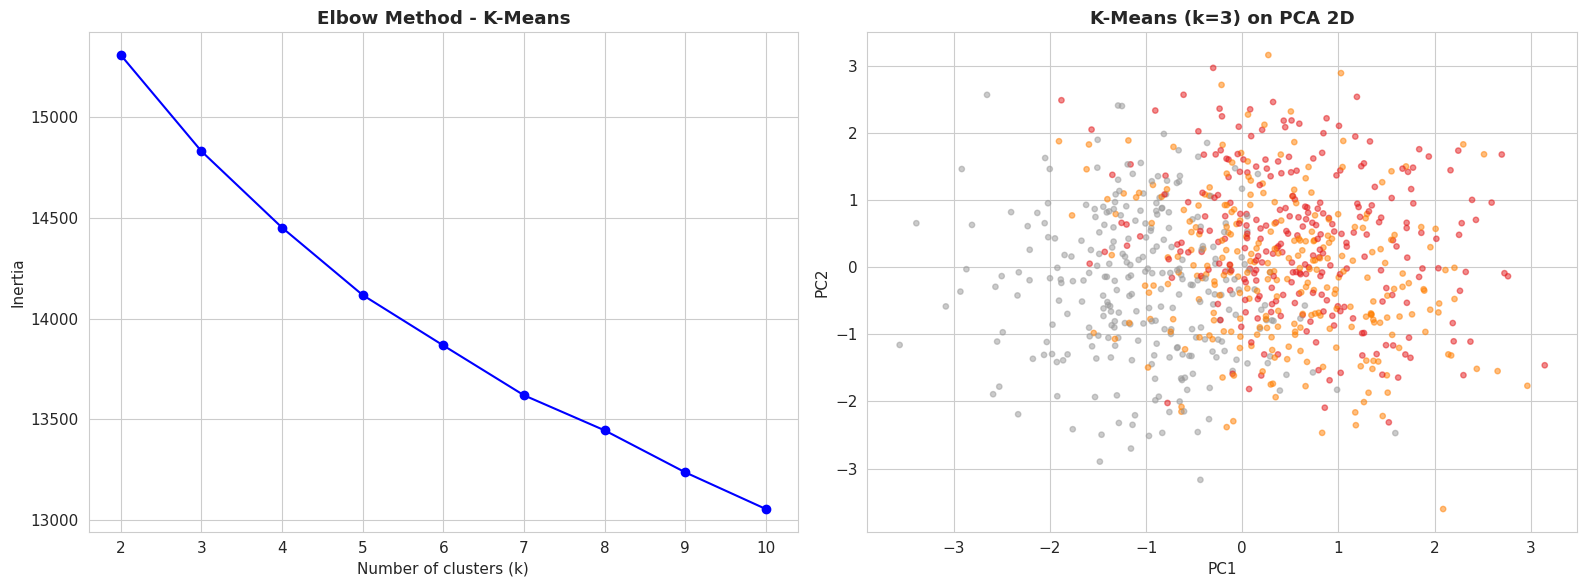

In [13]:
inertias = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method - K-Means', fontweight='bold')

km3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_km = km3.fit_predict(X_scaled)
axes[1].scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels_km, cmap='Set1', alpha=0.5, s=15)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('K-Means (k=3) on PCA 2D', fontweight='bold')
plt.tight_layout()
plt.show()


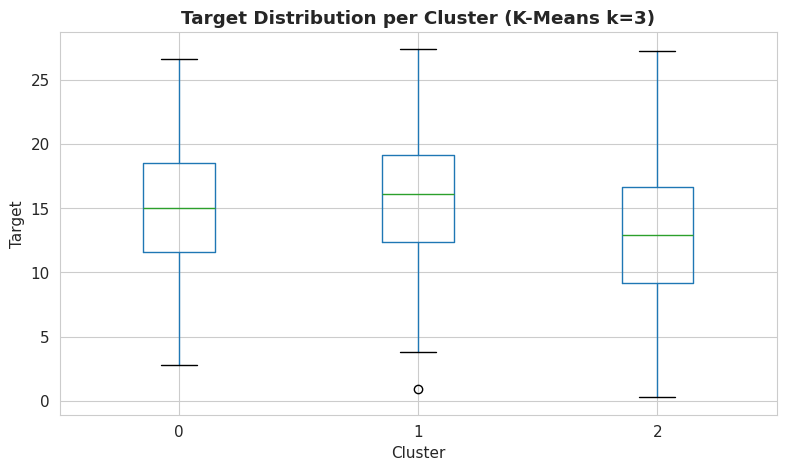

         count       mean       std       min        25%        50%  \
cluster                                                               
0        261.0  15.112330  5.049828  2.781917  11.606340  14.990540   
1        269.0  15.669838  4.819778  0.888915  12.386595  16.113917   
2        270.0  13.131739  5.058378  0.279805   9.189864  12.908164   

               75%        max  
cluster                        
0        18.542086  26.589465  
1        19.097340  27.360789  
2        16.633228  27.238534  


In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
cluster_df = pd.DataFrame({'cluster': labels_km, 'target': y})
cluster_df.boxplot(column='target', by='cluster', ax=ax)
ax.set_title('Target Distribution per Cluster (K-Means k=3)', fontweight='bold')
ax.set_xlabel('Cluster')
ax.set_ylabel('Target')
plt.suptitle('')
plt.tight_layout()
plt.show()

print(cluster_df.groupby('cluster')['target'].describe())


## 10. Feature Interactions

Product of the top 5 features and their correlation with the target.


Top 5 features: ['feature_2', 'feature_13', 'feature_9', 'feature_11', 'feature_4']



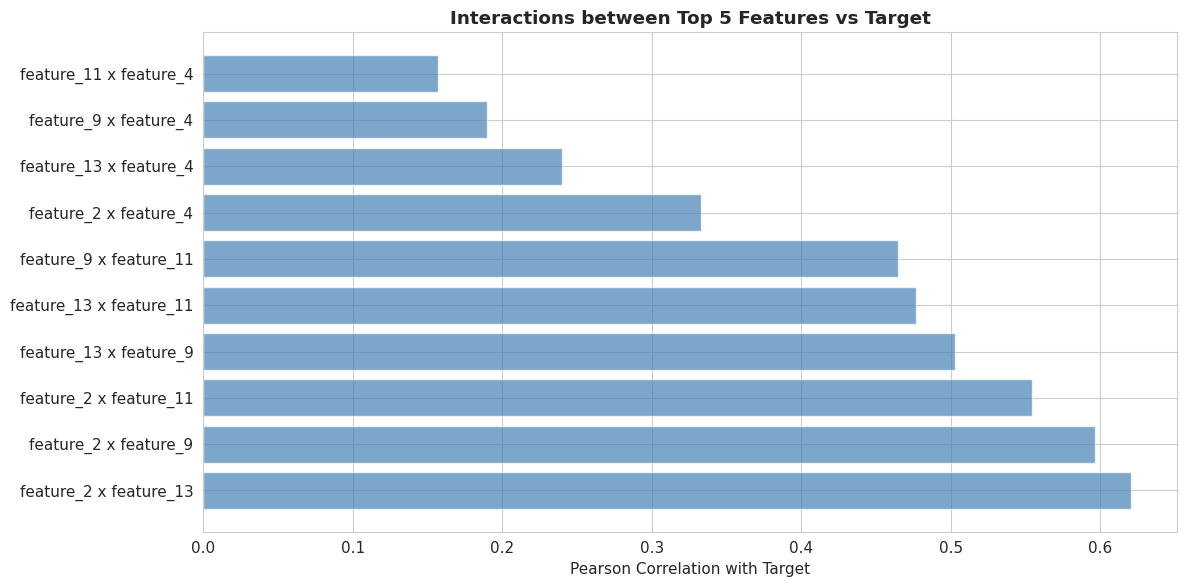

            Interaction  Pearson  Spearman
 feature_2 x feature_13   0.6203    0.6444
  feature_2 x feature_9   0.5962    0.6242
 feature_2 x feature_11   0.5546    0.5687
 feature_13 x feature_9   0.5028    0.5954
feature_13 x feature_11   0.4767    0.5085
 feature_9 x feature_11   0.4646    0.4961
  feature_2 x feature_4   0.3331    0.3240
 feature_13 x feature_4   0.2397    0.2656
  feature_9 x feature_4   0.1900    0.2309
 feature_11 x feature_4   0.1574    0.1830

Best interaction: feature_2 x feature_13 with r=0.6203


In [15]:
top5 = corr_with_target.head(5).index.tolist()
print(f"Top 5 features: {top5}\n")

interaction_corrs = []
for i in range(len(top5)):
    for j in range(i+1, len(top5)):
        f1, f2 = top5[i], top5[j]
        interaction = df[f1] * df[f2]
        r_pearson = interaction.corr(y)
        r_spearman, _ = stats.spearmanr(interaction, y)
        interaction_corrs.append({
            'Interaction': f'{f1} x {f2}',
            'Pearson': round(r_pearson, 4),
            'Spearman': round(r_spearman, 4),
        })

int_df = pd.DataFrame(interaction_corrs).sort_values('Pearson', key=abs, ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(int_df['Interaction'], int_df['Pearson'], color='steelblue', alpha=0.7)
ax.set_xlabel('Pearson Correlation with Target')
ax.set_title('Interactions between Top 5 Features vs Target', fontweight='bold')
plt.tight_layout()
plt.show()

print(int_df.to_string(index=False))
print(f"\nBest interaction: {int_df.iloc[0]['Interaction']} with r={int_df.iloc[0]['Pearson']}")


## 11. Mutual Information

Captures both linear and non-linear dependencies between each feature and the target.


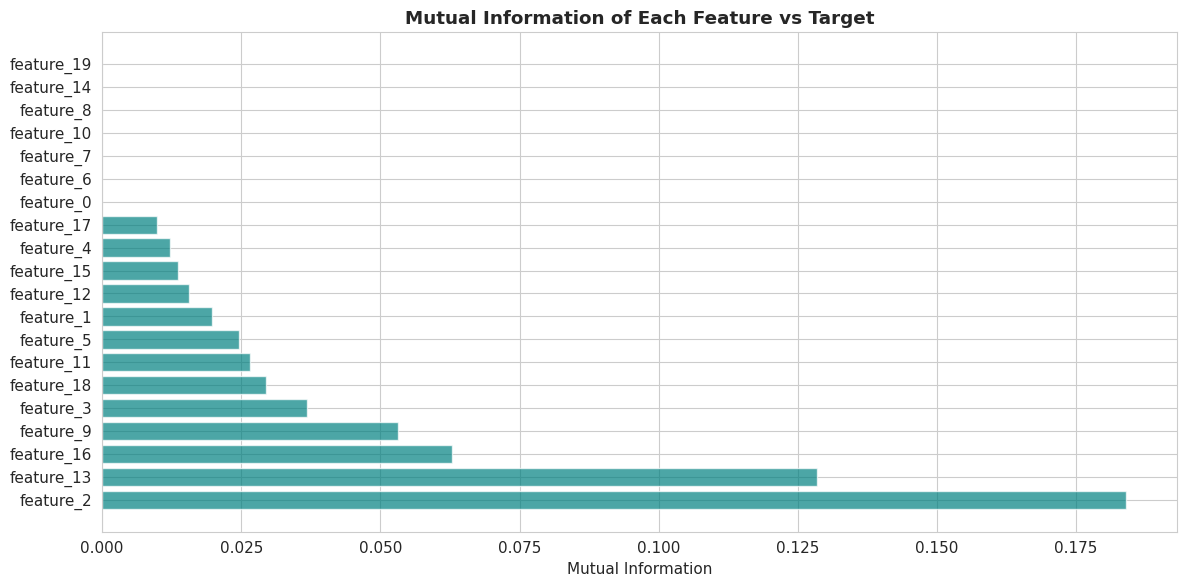

   Feature       MI
 feature_2 0.183933
feature_13 0.128519
feature_16 0.062835
 feature_9 0.053173
 feature_3 0.036736
feature_18 0.029492
feature_11 0.026642
 feature_5 0.024683
 feature_1 0.019825
feature_12 0.015696
feature_15 0.013716
 feature_4 0.012256
feature_17 0.009899
 feature_0 0.000000
 feature_6 0.000000
 feature_7 0.000000
feature_10 0.000000
 feature_8 0.000000
feature_14 0.000000
feature_19 0.000000

Features with MI > 0: 13 out of 20
Features with MI = 0: 7 out of 20


In [16]:
mi = mutual_info_regression(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': features, 'MI': mi}).sort_values('MI', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(mi_df['Feature'], mi_df['MI'], color='teal', alpha=0.7)
ax.set_xlabel('Mutual Information')
ax.set_title('Mutual Information of Each Feature vs Target', fontweight='bold')
plt.tight_layout()
plt.show()

print(mi_df.to_string(index=False))
print(f"\nFeatures with MI > 0: {(mi_df['MI'] > 0).sum()} out of {len(features)}")
print(f"Features with MI = 0: {(mi_df['MI'] == 0).sum()} out of {len(features)}")


## 12. Target Normality

To decide whether a transformation (log, Box-Cox) is needed.


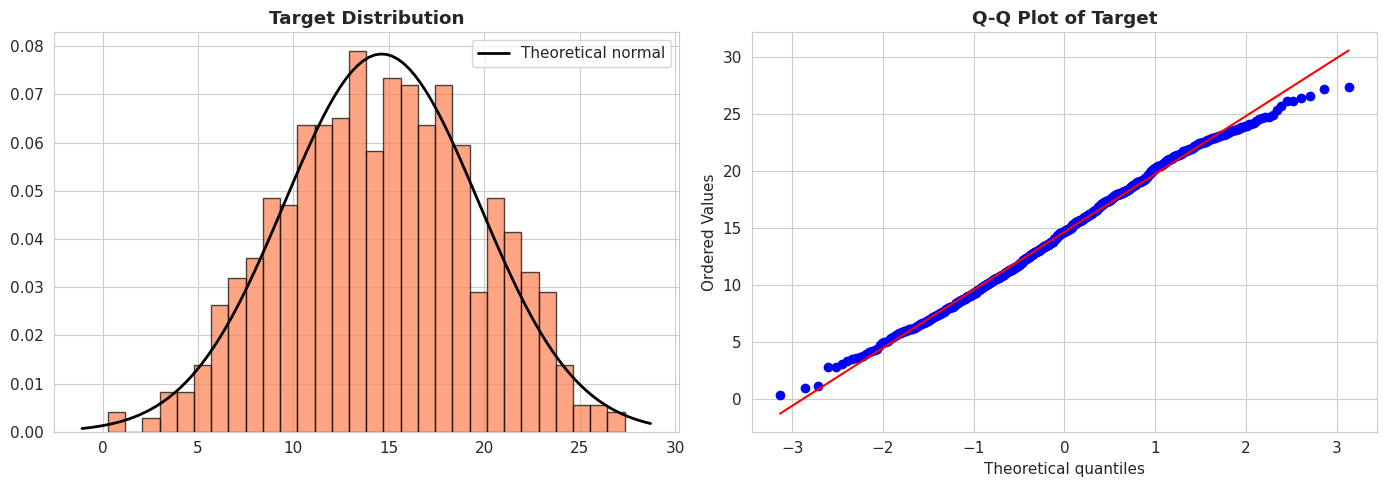

Skewness: -0.0398
Kurtosis: -0.5402
Shapiro-Wilk statistic: 0.994303
Shapiro-Wilk p-value: 0.004147
Target is approximately normal


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(y, bins=30, edgecolor='black', alpha=0.7, color='coral', density=True)
xmin, xmax = axes[0].get_xlim()
x_range = np.linspace(xmin, xmax, 100)
axes[0].plot(x_range, stats.norm.pdf(x_range, y.mean(), y.std()), 'k-', lw=2, label='Theoretical normal')
axes[0].set_title('Target Distribution', fontweight='bold')
axes[0].legend()

stats.probplot(y, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Target', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Skewness: {y.skew():.4f}")
print(f"Kurtosis: {y.kurtosis():.4f}")
shapiro_stat, shapiro_p = stats.shapiro(y)
print(f"Shapiro-Wilk statistic: {shapiro_stat:.6f}")
print(f"Shapiro-Wilk p-value: {shapiro_p:.6f}")
if abs(y.skew()) < 0.5:
    print("Target is approximately normal")
else:
    print("Target is skewed, consider transformation")


## 13. Feature Scaling

To decide whether to standardize before modeling.


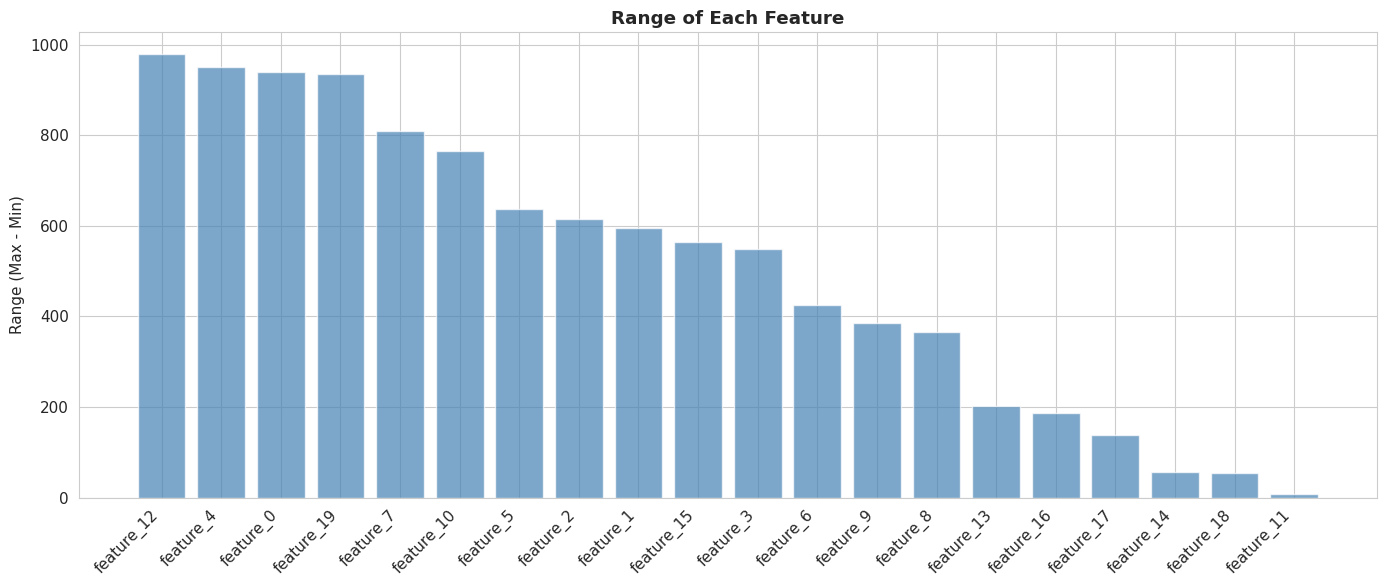

   Feature      Min        Max      Range       Mean        Std
feature_12 1.706240 979.715063 978.008823 479.841915 276.304197
 feature_4 0.598527 950.017444 949.418917 485.975950 272.594030
 feature_0 0.916648 940.771543 939.854896 468.181612 270.797415
feature_19 0.252919 935.740775 935.487856 457.016407 270.650146
 feature_7 0.474825 809.346792 808.871967 387.196289 235.131376
feature_10 1.487605 767.311089 765.823485 401.079696 228.533579
 feature_5 0.997347 638.199832 637.202485 320.953859 185.157189
 feature_2 0.173025 614.271632 614.098607 317.132996 176.501920
 feature_1 0.800119 595.359858 594.559739 301.960218 170.691136
feature_15 1.726915 566.611509 564.884594 277.205999 167.385930
 feature_3 0.308823 549.896216 549.587393 283.213456 157.698215
 feature_6 0.402436 426.308251 425.905815 217.136330 123.660691
 feature_9 0.264253 384.919108 384.654855 196.003058 111.042671
 feature_8 0.727850 367.084755 366.356905 179.485453 104.059309
feature_13 0.194306 203.122292 202.92798

In [18]:
range_df = pd.DataFrame({
    'Feature': features,
    'Min': X.min().values,
    'Max': X.max().values,
    'Range': (X.max() - X.min()).values,
    'Mean': X.mean().values,
    'Std': X.std().values
}).sort_values('Range', ascending=False)

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(range_df['Feature'], range_df['Range'], color='steelblue', alpha=0.7)
ax.set_ylabel('Range (Max - Min)')
ax.set_title('Range of Each Feature', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(range_df.to_string(index=False))
print(f"\nMin range: {range_df['Range'].min():.2f} ({range_df.iloc[-1]['Feature']})")
print(f"Max range: {range_df['Range'].max():.2f} ({range_df.iloc[0]['Feature']})")
ratio = range_df['Range'].max() / range_df['Range'].min()
if ratio > 10:
    print(f"\nScales differ significantly (ratio {ratio:.0f}x) -- standardization recommended for linear/distance-based models")
else:
    print("\nScales are similar")


## Key Findings Summary

- **20 numeric features**, all float64, no nulls
- **Target** is approximately normal (skewness close to 0), no transformation needed
- **Multicollinearity**: VIF very low for all features (all < 1.05) -- no multicollinearity
- **Most important features** (Pearson + MI): feature_2, feature_13, feature_9, feature_11
- **Interactions**: feature_2 x feature_13 has correlation 0.62 with target (higher than any individual feature)
- **PCA**: Features are quite independent (~18 components needed for 90% variance)
- **Very different scales**: feature_11 ranges 0-7, while feature_12 ranges 0-980 -- standardize for linear models
- **MI = 0 for several features**: feature_0, 6, 7, 8, 10, 14, 19 appear to contribute no information

### Implications for modeling
1. Linear regression can work but interactions are key
2. Tree-based models (Random Forest, XGBoost) capture interactions automatically
3. Standardization needed only for distance-based models
4. No need to remove features due to multicollinearity
